# Diffusivity Loader

In [18]:
import scipy.io
import h5py
import h5py
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cmocean.cm as cmo

In [ ]:
with h5py.File('/swot/SUM05/amf2288/global_kappa_epsilon.mat', 'r') as f:
    # Print the keys to understand the structure
    print(list(f.keys()))

In [ ]:
# Load the .mat file using h5py
with h5py.File('/swot/SUM05/amf2288/global_kappa_epsilon.mat', 'r') as f:
    # Print the keys to understand the structure
    print(list(f.keys()))

    # Access and print the shape and data type of each variable or group
    for key in f.keys():
        item = f[key]
        if isinstance(item, h5py.Group):
            print(f"Group '{key}': contains {list(item.keys())}")
        elif isinstance(item, h5py.Dataset):
            print(f"Dataset '{key}': shape={item.shape}, dtype={item.dtype}")
        else:
            print(f"Unknown type for '{key}'")


In [ ]:
# Load the .mat file using h5py
with h5py.File('/swot/SUM05/amf2288/global_kappa_epsilon.mat', 'r') as f:
    # Access datasets
    K = f['A4']['K'][:]
    e = f['A4']['e'][:]
    lat = f['A4']['lat'][:].reshape(-1)  # Reshape to 1D
    lon = f['A4']['lon'][:].reshape(-1)  # Reshape to 1D
    z = f['A4']['z'][:].reshape(-1)      # Reshape to 1D

    # Print the shape and type of the data to understand its structure
    print(f"K: shape={K.shape}, dtype={K.dtype}")
    print(f"e: shape={e.shape}, dtype={e.dtype}")
    print(f"lat: shape={lat.shape}, dtype={lat.dtype}")
    print(f"lon: shape={lon.shape}, dtype={lon.dtype}")
    print(f"z: shape={z.shape}, dtype={z.dtype}")

    # Create an xarray.Dataset
    ds = xr.Dataset(
        {
            'K': (('z', 'lon', 'lat'), K),
            'e': (('z', 'lon', 'lat'), e)
        },
        coords={
            'lat': lat,
            'lon': lon,
            'z': z
        }
    )

In [ ]:
ds.to_netcdf('/swot/SUM05/amf2288/global_kappa_epsilon.nc')

In [2]:
ds = xr.open_dataset('/swot/SUM05/amf2288/global_kappa_epsilon.nc')

In [3]:
# Create a new longitude variable
new_lon = ((ds['lon'] + 180) % 360) - 180

# Add the new_lon as a coordinate or variable to the dataset
ds = ds.assign_coords(lon=new_lon)
ds = ds.sortby('lon').sortby('lat')

In [4]:
z_l   = np.arange(250,2000,250)
z_r   = np.arange(500,2001,250)

lon_l = np.arange(-180,180,3)
lon_r = np.arange(-177,181,3)

lat_l = np.arange(-67.5,67.5,3)
lat_r = np.arange(-64.5,68.5,3)

In [5]:
ds = ds.rename({'lon':'lon_c','lat':'lat_c','z':'z_c'})
ds = ds.assign_coords({'z_l':('z_c',z_l), 'z_r':('z_c',z_r), 'lon_l':('lon_c',lon_l), 'lon_r':('lon_c',lon_r), 'lat_l':('lat_c',lat_l), 'lat_r':('lat_c',lat_r)})
ds

<xarray.Dataset> Size: 609kB
Dimensions:  (z_c: 7, lon_c: 120, lat_c: 45)
Coordinates:
  * lat_c    (lat_c) float64 360B -66.0 -63.0 -60.0 -57.0 ... 60.0 63.0 66.0
  * z_c      (z_c) float64 56B 375.0 625.0 875.0 ... 1.625e+03 1.875e+03
  * lon_c    (lon_c) float64 960B -178.5 -175.5 -172.5 ... 172.5 175.5 178.5
    z_l      (z_c) int64 56B 250 500 750 1000 1250 1500 1750
    z_r      (z_c) int64 56B 500 750 1000 1250 1500 1750 2000
    lon_l    (lon_c) int64 960B -180 -177 -174 -171 -168 ... 165 168 171 174 177
    lon_r    (lon_c) int64 960B -177 -174 -171 -168 -165 ... 168 171 174 177 180
    lat_l    (lat_c) float64 360B -67.5 -64.5 -61.5 -58.5 ... 58.5 61.5 64.5
    lat_r    (lat_c) float64 360B -64.5 -61.5 -58.5 -55.5 ... 61.5 64.5 67.5
Data variables:
    K        (z_c, lon_c, lat_c) float64 302kB ...
    e        (z_c, lon_c, lat_c) float64 302kB ...

In [6]:
ds.isel(z_c=0)

<xarray.Dataset> Size: 90kB
Dimensions:  (lon_c: 120, lat_c: 45)
Coordinates:
  * lat_c    (lat_c) float64 360B -66.0 -63.0 -60.0 -57.0 ... 60.0 63.0 66.0
    z_c      float64 8B 375.0
  * lon_c    (lon_c) float64 960B -178.5 -175.5 -172.5 ... 172.5 175.5 178.5
    z_l      int64 8B 250
    z_r      int64 8B 500
    lon_l    (lon_c) int64 960B -180 -177 -174 -171 -168 ... 165 168 171 174 177
    lon_r    (lon_c) int64 960B -177 -174 -171 -168 -165 ... 168 171 174 177 180
    lat_l    (lat_c) float64 360B -67.5 -64.5 -61.5 -58.5 ... 58.5 61.5 64.5
    lat_r    (lat_c) float64 360B -64.5 -61.5 -58.5 -55.5 ... 61.5 64.5 67.5
Data variables:
    K        (lon_c, lat_c) float64 43kB ...
    e        (lon_c, lat_c) float64 43kB ...

Convention here is to make "outer" dimension which has the boundaries of all intervals, including the left and right boundary. This means the outer dimension would have one extra grid point compared to center

In [7]:
ds = ds.sortby('lon_c').sortby('lat_c')

In [10]:
ds.K.max()

<xarray.DataArray 'K' ()> Size: 8B
array(0.00513481)

In [39]:
start = 10**-6
end   = 10**-4
norm  = colors.LogNorm(vmin=start, vmax=end)
cmap  = cmo.matter_r

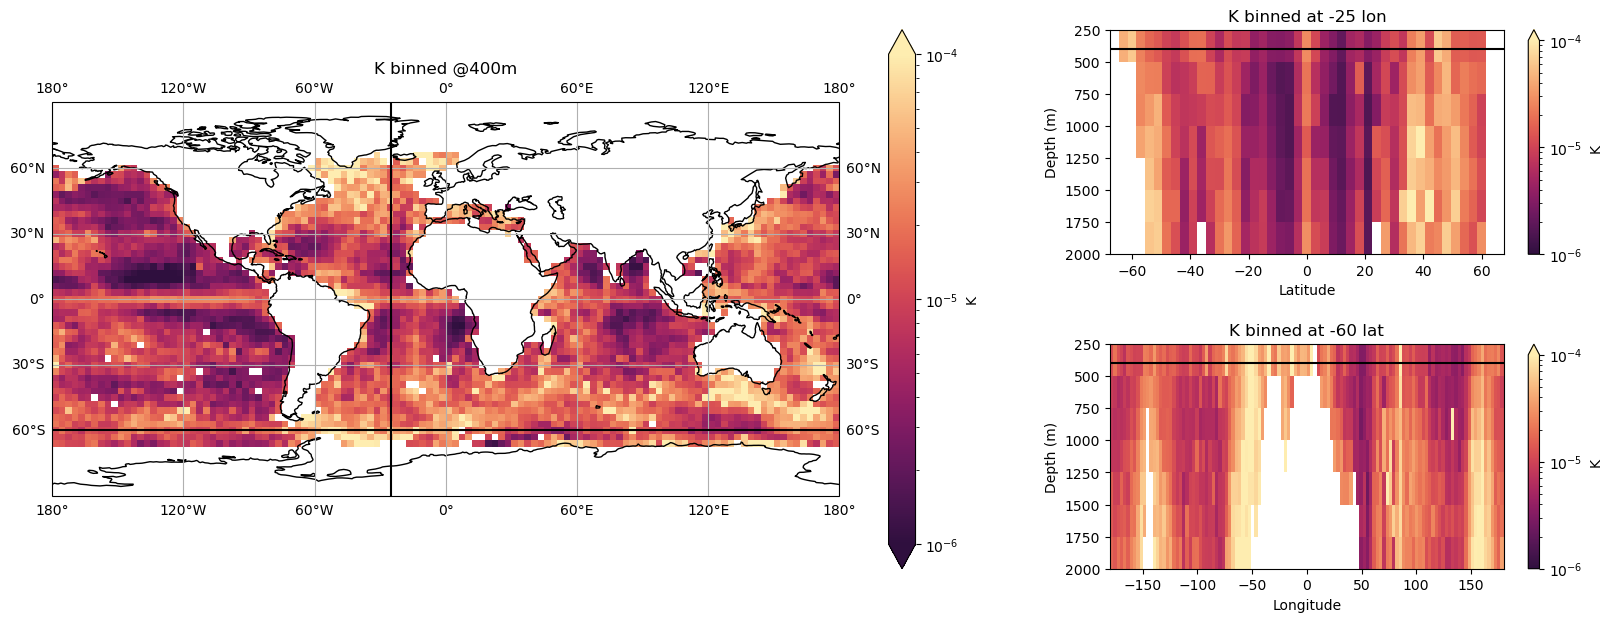

In [40]:
plt.figure(figsize=(20, 7))
gs = plt.GridSpec(2, 2, width_ratios=[2, 1])

ax1 = plt.subplot(gs[:, 0], projection=ccrs.PlateCarree())
ax1.coastlines()
#ax1.gridlines(xlocs=np.arange(-180, 180, 20), ylocs=np.arange(-90, 90, 20), draw_labels=True)
ax1.gridlines(draw_labels=True)
ax1.axvline(lon, color='k')
ax1.axhline(lat, color='k')
ds[var].sel(z_c=depth, method='nearest').plot(x='lon_c', y='lat_c', ax=ax1, norm=norm, cmap=cmap)
ax1.set_title(f'{var} binned @{depth}m')

ax2 = plt.subplot(gs[0, 1])
ds[var].sel(lon_c=lon, method='nearest').plot(x='lat_c', y='z_c', ax=ax2, norm=norm, cmap=cmap)
ax2.invert_yaxis()
ax2.axhline(depth, color='k')
plt.xlabel('Latitude')
plt.ylabel('Depth (m)')
ax2.set_title(f'{var} binned at {lon} lon')

ax4 = plt.subplot(gs[1, 1])
ds[var].sel(lat_c=lat, method='nearest').plot(x='lon_c', y='z_c', ax=ax4, norm=norm, cmap=cmap)
ax4.invert_yaxis()
ax4.axhline(depth, color='k')
plt.xlabel('Longitude')
plt.ylabel('Depth (m)')
ax4.set_title(f'{var} binned at {lat} lat')

plt.subplots_adjust(hspace=0.4, wspace=0.1)
plt.show()

## Interpolation to argo grid